# Chapter 12: Insurance redlining example

Load in the Python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

## Ecological Correlation

Read in the data:

In [2]:
eco = pd.read_csv("data/eco.csv", index_col=0)
eco.head()

,usborn,income,home,pop
Alabama,0.98656,21442,75.9,4040587
Alaska,0.93914,25675,34.0,550043
Arizona,0.90918,23060,34.2,3665228
Arkansas,0.98688,20346,67.1,2350725
California,0.74541,27503,46.4,29760021


Plot the data:

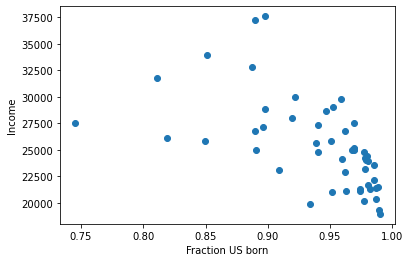

In [3]:
plt.scatter(eco.usborn, eco.income)
plt.ylabel("Income")
plt.xlabel("Fraction US born")
plt.show()

In [4]:
lmod = sm.OLS(eco.income, sm.add_constant(eco.usborn)).fit()
lmod.summary()

C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     24.60
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           8.89e-06
Time:                        16:35:33   Log-Likelihood:                -487.38
No. Observations:                  51   AIC:                             978.8
Df Residuals:                      49   BIC:                             982.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.864e+04   8739.004      7.855      0.000    5.11e+04    8.62e+04
usborn     -4.602e+04   9279.116     -4.959      0.000   -6.47e+04   -2.74e+04
==============================================================================
Omnibus:                        7.381   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.433
Skew:                           0.727   Prob(JB):                       0.0401
Kurtosis:                       3.956   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

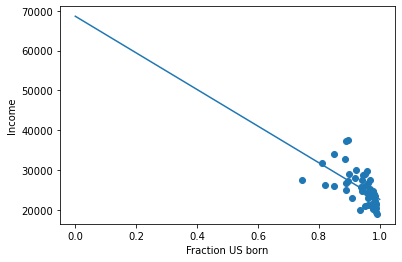

In [5]:
plt.scatter(eco.usborn, eco.income)
plt.ylabel("Income")
plt.xlabel("Fraction US born")
plt.plot([0, 1.0], [lmod.params[0] + lmod.params[1]*0.0, lmod.params[0] + lmod.params[1]*1])
plt.show()

## Initial Data Analysis

Read in and plot the data:

In [6]:
chredlin = pd.read_csv("data/chredlin.csv", index_col=0)
chredlin.head()

,race,fire,theft,age,involact,income,side
60626,10.0,6.2,29,60.4,0.0,11.744,n
60640,22.2,9.5,44,76.5,0.1,9.323,n
60613,19.6,10.5,36,73.5,1.2,9.948,n
60657,17.3,7.7,37,66.9,0.5,10.656,n
60614,24.5,8.6,53,81.4,0.7,9.730,n


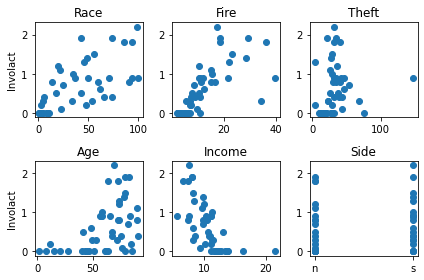

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
ax1.scatter(chredlin.race, chredlin.involact)
ax1.set(title="Race")
ax1.set_ylabel("Involact")

ax2.scatter(chredlin.fire, chredlin.involact)
ax2.set(title="Fire")

ax3.scatter(chredlin.theft, chredlin.involact)
ax3.set(title="Theft")

ax4.scatter(chredlin.age, chredlin.involact)
ax4.set(title="Age")
ax4.set_ylabel("Involact")

ax5.scatter(chredlin.income, chredlin.involact)
ax5.set(title="Income")

ax6.scatter(chredlin.side, chredlin.involact)
ax6.set(title="Side")

fig.tight_layout()
plt.show()

A more compact way of achieving a similar result:

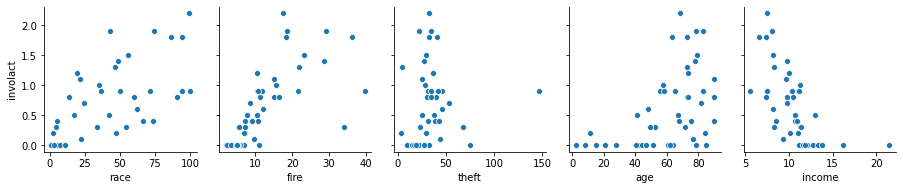

In [8]:
import seaborn as sns
sns.pairplot(chredlin, x_vars=["race","fire","theft","age","income"], y_vars="involact")
plt.show()

In [9]:
lmod = sm.OLS(chredlin.involact, sm.add_constant(chredlin.race)).fit()
lmod.summary()

C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               involact   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.78e-08
Time:                        16:35:34   Log-Likelihood:                -28.016
No. Observations:                  47   AIC:                             60.03
Df Residuals:                      45   BIC:                             63.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.097      1.338      0.188      -0.065       0.324
race           0.0139      0.002      6.836      0.000       0.010       0.018
==============================================================================
Omnibus:                        2.747   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.582
Skew:                           0.549   Prob(JB):                        0.275
Kurtosis:                       2.666   Cond. No.                         70.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

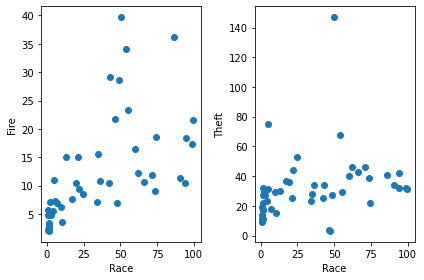

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(chredlin.race, chredlin.fire)
plt.xlabel("Race")
plt.ylabel("Fire")

plt.subplot(1, 2, 2)
plt.scatter(chredlin.race, chredlin.theft)
plt.xlabel("Race")
plt.ylabel("Theft")

plt.tight_layout()

plt.show()

# Full model with diagnostics

In [11]:
lmod = smf.ols(formula='involact ~ race + fire + theft + age + np.log(income)', data=chredlin).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               involact   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     24.83
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.01e-11
Time:                        16:35:35   Log-Likelihood:                -12.014
No. Observations:                  47   AIC:                             36.03
Df Residuals:                      41   BIC:                             47.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1855      1.100     -1.078      0.288      -3.408       1.036
race               0.0095      0.002      3.817      0.000       0.004       0.015
fire               0.0399      0.009      4.547      0.000       0.022       0.058
theft             -0.0103      0.003     -3.653      0.001      -0.016      -0.005
age                0.0083      0.003      3.038      0.004       0.003       0.014
np.log(income)     0.3458      0.400      0.864      0.393      -0.462       1.154
==============================================================================
Omnibus:                        2.243   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.355
Skew:                           0.170   Prob(JB):                        0.508
Kurtosis:                       3.759   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

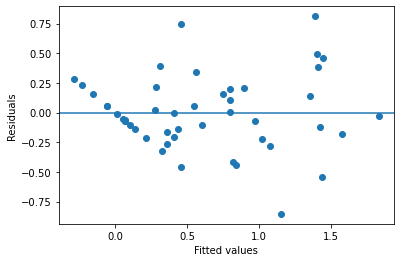

In [12]:
plt.scatter(lmod.fittedvalues, lmod.resid)
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.axhline(0)
plt.show()

Trick needed to get statsmodels plots not to appear twice:

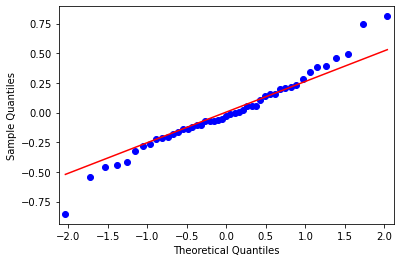

In [13]:
fig=sm.qqplot(lmod.resid, line="q")

Make the partial residual plots

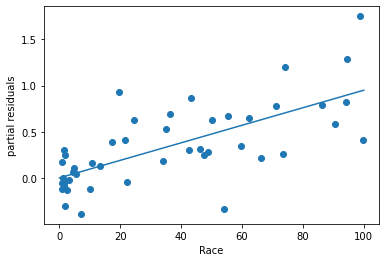

In [14]:
pr = lmod.resid + chredlin.race*lmod.params['race']
plt.scatter(chredlin.race, pr)
plt.xlabel("Race")
plt.ylabel("partial residuals")
xl,xu = [0, 100]
plt.plot([xl,xu], [xl*lmod.params['race'], xu*lmod.params['race']])
plt.show()

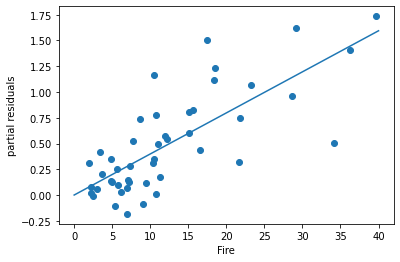

In [15]:
pr = lmod.resid + chredlin.fire*lmod.params['fire']
plt.scatter(chredlin.fire, pr)
plt.xlabel("Fire")
plt.ylabel("partial residuals")
xl,xu = [0, 40]
plt.plot([xl,xu], [xl*lmod.params['fire'], xu*lmod.params['fire']])
plt.show()

# Sensitivity Analysis

Generate all combinations

In [16]:
import itertools
inds = [1, 2, 3, 4]
clist = []
for i in range(0, len(inds)+1):
    clist.extend(itertools.combinations(inds, i))
clist

[(),
 (1,),
 (2,),
 (3,),
 (4,),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 (1, 2, 3, 4)]

In [17]:
X = chredlin.iloc[:,[0,1,2,3,5]].copy()
X.loc[:,'income'] = np.log(chredlin['income'])
betarace = []
pvals = []
for k in range(0, len(clist)):
    lmod = sm.OLS(chredlin.involact, sm.add_constant(X.iloc[:,np.append(0,clist[k])])).fit()
    betarace.append(lmod.params[1])
    pvals.append(lmod.pvalues[1])

C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Construct list of model names

In [18]:
vlist = ['race']
varnames = np.array(['race','fire','theft','age','logincome'])
for k in range(1, len(clist)):
    vlist.append('+'.join(varnames[np.append(0,clist[k])]))
vlist

['race',
 'race+fire',
 'race+theft',
 'race+age',
 'race+logincome',
 'race+fire+theft',
 'race+fire+age',
 'race+fire+logincome',
 'race+theft+age',
 'race+theft+logincome',
 'race+age+logincome',
 'race+fire+theft+age',
 'race+fire+theft+logincome',
 'race+fire+age+logincome',
 'race+theft+age+logincome',
 'race+fire+theft+age+logincome']

In [19]:
pd.DataFrame({'beta':np.round(betarace,4), 'pvals':np.round(pvals,4)}, index=vlist)

,beta,pvals
race,0.0139,0.0000
race+fire,0.0089,0.0002
race+theft,0.0141,0.0000
race+age,0.0123,0.0000
race+logincome,0.0082,0.0087
race+fire+theft,0.0082,0.0002
race+fire+age,0.0089,0.0001
race+fire+logincome,0.0070,0.0160
race+theft+age,0.0128,0.0000
race+theft+logincome,0.0084,0.0083


Calculate the dfbetas - note these are not the same as leave out one coef changes as they have been scaled to standard error changes

In [20]:
lmod = smf.ols(formula='involact ~ race + fire + theft + age + np.log(income)', data=chredlin).fit()
diagv = lmod.get_influence()
min(diagv.dfbetas[:,1])

-0.3995427771699168

Since the t-statistic is 3.82, a reduction of 0.4 is not going make a difference to the conclusion.

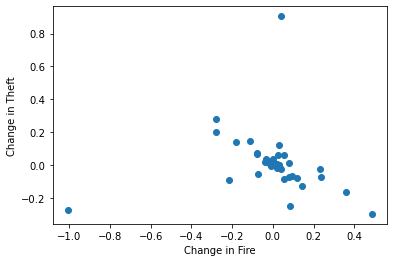

In [21]:
plt.scatter(diagv.dfbetas[:,2], diagv.dfbetas[:,3])
plt.xlabel("Change in Fire")
plt.ylabel("Change in Theft")
plt.show()

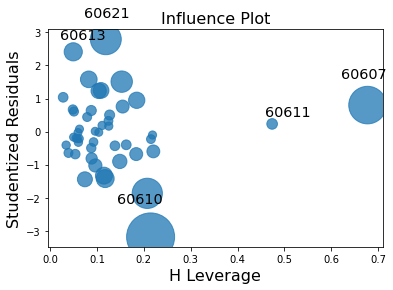

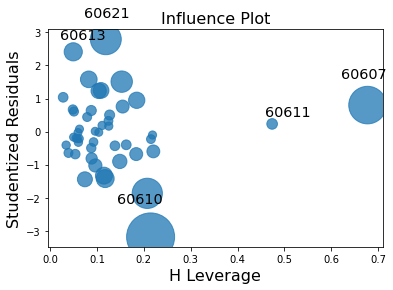

In [22]:
sm.graphics.influence_plot(lmod)

In [23]:
chredlin.loc[[60607, 60610],:]

,race,fire,theft,age,involact,income,side
60607,50.2,39.7,147,83.0,0.9,7.459,n
60610,54.0,34.1,68,52.6,0.3,8.231,n


Leave out these two case. Could be a more elegant way?

In [24]:
ch45 = chredlin.loc[~chredlin.index.isin([60607, 60610]),:]
lmod45 = smf.ols(formula='involact ~ race + fire + np.log(income)', data=ch45).fit()
lmod45.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               involact   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     50.14
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           8.87e-14
Time:                        16:35:36   Log-Likelihood:                -8.9369
No. Observations:                  45   AIC:                             25.87
Df Residuals:                      41   BIC:                             33.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7533      0.836      0.901      0.373      -0.935       2.441
race               0.0042      0.002      1.848      0.072      -0.000       0.009
fire               0.0510      0.008      6.038      0.000       0.034       0.068
np.log(income)    -0.3624      0.319     -1.135      0.263      -1.007       0.282
==============================================================================
Omnibus:                        5.938   Durbin-Watson:                   2.390
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.224
Skew:                           0.531   Prob(JB):                       0.0734
Kurtosis:                       4.288   Cond. No.                         947.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Discussion

In [25]:
lmods = smf.ols(formula='involact ~ race + fire + theft + age', data=chredlin.loc[chredlin.side == 's',:]).fit()
lmods.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               involact   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     12.31
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           6.97e-05
Time:                        16:35:36   Log-Likelihood:                -5.3371
No. Observations:                  22   AIC:                             20.67
Df Residuals:                      17   BIC:                             26.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2344      0.238     -0.986      0.338      -0.736       0.267
race           0.0059      0.003      1.814      0.087      -0.001       0.013
fire           0.0484      0.017      2.866      0.011       0.013       0.084
theft         -0.0066      0.008     -0.787      0.442      -0.024       0.011
age            0.0050      0.005      0.993      0.335      -0.006       0.016
==============================================================================
Omnibus:                        6.437   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.177
Skew:                           0.806   Prob(JB):                        0.124
Kurtosis:                       4.399   Cond. No.                         277.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lmodn = smf.ols(formula='involact ~ race + fire + theft + age', data=chredlin.loc[chredlin.side == 'n',:]).fit()
lmodn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               involact   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     15.45
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           6.52e-06
Time:                        16:35:36   Log-Likelihood:                -5.9264
No. Observations:                  25   AIC:                             21.85
Df Residuals:                      20   BIC:                             27.95
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3186      0.227     -1.403      0.176      -0.792       0.155
race           0.0126      0.004      2.806      0.011       0.003       0.022
fire           0.0231      0.014      1.655      0.114      -0.006       0.052
theft         -0.0076      0.004     -2.069      0.052      -0.015    6.13e-05
age            0.0082      0.003      2.369      0.028       0.001       0.015
==============================================================================
Omnibus:                        1.447   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                0.375
Skew:                          -0.068   Prob(JB):                        0.829
Kurtosis:                       3.584   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""